<p><a name="sections"></a></p>


# Gaming Mice in Newegg

- <a href="#DP">Data Processing</a><br>
- <a href="#GA">General Analysis</a><br>
- <a href="#FP">Factors Contributing to Price</a><br>
- <a href="#FR">Factors Contributing to Rating</a><br>
- <a href="#CM">Correlation Matrix</a><br>

<p><a name="DP"></a></p>

### Data Processing

The data was scraped from newegg. The specific mice looked at are new, right-handed gaming mice that ship from the U.S. 

The fields scraped include:
- Brand
- Product Name
- Model
- Grip Style
- Maximum DPI
- Buttons
- Connection Type
- Color
- Average Review Rating (1-5 Stars to the nearest star)
- Number of Reviews
- Price

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

# Read in csv
mice = pd.read_csv('./mice/mice.csv')

# Rearrange and rename columns
mice = mice[['brand', 'name', 'model', 'style', 'dpi', 'buttons', 'ctype', 'color', 'rating', 'reviews', 'price']]
mice.columns = ['Brand', 'Name', 'Model', 'Style', 'DPI', 'Buttons', 'Connection', 'Color', 'Rating', 'Reviews', 'Price']
mice.head()

,Brand,Name,Model,Style,DPI,Buttons,Connection,Color,Rating,Reviews,Price
0,Corsair,HARPOON,CH-9311011-NA,Claw,10000 dpi,6,Wired / Wireless,Black,4.0,83,49.99
1,UtechSmart,Venus,US-D16400-GM,NaN,16400 dpi,19,Wired,Black,4.0,242,29.99
2,Sades,NaN,NaN,Palm,3200dpi,6,Wired,Pink,4.0,4,18.49
3,AULA,Wired Gaming Mouse,F805,NaN,6400 dpi,7,Wired,Black,4.0,2,14.99
4,RAZER,DeathAdder Elite,RZ01-02010100-R3U1,NaN,16000 dpi,7,Wired,Black,4.0,642,30.99


**Brand**
- Will capitalize the Brand to reduce inconsistencies.
- Check items that do not make sense.

**Grip Style**
- Will convert instances of more than one and "All" to "Multiple".
- Check items that do not make sense.

**Maximum DPI**
- Check items that do not make sense.
- Convert to int.

**Buttons**
- Check items that do not make sense.

**Connection Type**
- Will only differentiate between wire or wireless.

In [2]:
# Brand
mice['Brand'] = mice['Brand'].str.upper()
mice.loc[(mice.Brand == 'FREE WORF'),'Brand']='FREE WOLF'

In [3]:
# Style
mice['Style'] = mice['Style'].str.replace('Grip','')
mice.loc[(mice['Style'].str.contains('brand', na=False)),'Style']=np.nan
mice.loc[((mice.Style == 'All') | (mice.Style.str.contains('/| and | or |,')) | (mice.Style == 'Adjustable')),'Style']='Multiple'

In [4]:
# DPI
mice.loc[(mice['DPI'].str.contains('200-', na=False)),'DPI']='10000'
mice.loc[(mice['DPI'].str.contains('50~', na=False)),'DPI']='6400'
mice.loc[(mice['DPI'].str.contains('Pixart', na=False)),'DPI']='16000'
mice['DPI'] = mice['DPI'].str.extract('(\d+)')
mice.loc[mice['DPI'].notnull(), 'DPI'] = mice.loc[mice['DPI'].notnull(), 'DPI'].astype(int)

In [5]:
# Buttons
mice.loc[(mice['Buttons'].str.contains('digital', na=False)),'Buttons']='9'
mice.loc[(mice['Buttons'].str.contains('programmable buttons', na=False)),'Buttons']='6'
mice.loc[(mice['Buttons'].str.contains('8 programmable', na=False)),'Buttons']='9'
mice.loc[(mice['Buttons'].str.contains('OMRON', na=False)),'Buttons']='5'
mice.loc[mice['Buttons'].notnull(), 'Buttons'] = mice.loc[mice['Buttons'].notnull(), 'Buttons'].astype(int)

In [6]:
# Connection Type
mice.loc[(mice.Connection.str.contains('wireless|Wireless', na=False)),'Connection']='Wireless'

In [7]:
# Save to new file and load.
mice.to_csv(r'./mice/mice_modified.csv', index = False)
mice = pd.read_csv('./mice/mice_modified.csv')

In [8]:
mice.head()

,Brand,Name,Model,Style,DPI,Buttons,Connection,Color,Rating,Reviews,Price
0,CORSAIR,HARPOON,CH-9311011-NA,Claw,10000.0,6.0,Wireless,Black,4.0,83,49.99
1,UTECHSMART,Venus,US-D16400-GM,NaN,16400.0,19.0,Wired,Black,4.0,242,29.99
2,SADES,NaN,NaN,Palm,3200.0,6.0,Wired,Pink,4.0,4,18.49
3,AULA,Wired Gaming Mouse,F805,NaN,6400.0,7.0,Wired,Black,4.0,2,14.99
4,RAZER,DeathAdder Elite,RZ01-02010100-R3U1,NaN,16000.0,7.0,Wired,Black,4.0,642,30.99


<p><a name="GA"></a></p>

### General Analysis

**Brand**

Obervations:
- The brand with the highest number of products is not very well known and only has products in the lower price range. 5 out of the top 10 brands with the most products only produces lower price range mice, with the max price for each product not exceeding 40 dollars and median price for all products not exceeding 30 dollars.
- Only 5 out of the top 10 brands with the most products have more than 100 total number of reviews, indicating that having more products does not necessarily mean more popularity amongst customers.
- The top 10 brands with the most reviews, with the exception of 2, all have a mean rating of around 4 stars and a median of 4 stars. This suggests that the products from the 8 brands are all generally consistently good quality and no brand is noticeably disliked more than another.
- The one brand out of the top 10 brands with the most reviews that seems like outlier, "ZALMAN", is an interesting case since it only has 1 product which has 170 reviews by itself and has a mean and median rating of only 3 stars. The mouse is actually a "Gun Mouse" which likely explains why it stands out. 

In [9]:
colFun = {'Brand':['size'],
          'Rating': ['mean', 'median'], 
          'Reviews': ['sum'],
          'Price':['min','max', 'median']}

mice_brand = mice.groupby('Brand').agg(colFun)
mice_brand_product = mice_brand.sort_values(by=[('Brand', 'size')], ascending = False).head(10)
mice_brand_reviews = mice_brand.sort_values(by=[('Reviews', 'sum')], ascending = False).head(10)

print(mice_brand_product)
print('\n' * 2)
print(mice_brand_reviews)

            Brand    Rating        Reviews  Price                 
             size      mean median     sum    min     max   median
Brand                                                             
ZELOTES        30  3.900000    4.5      88  11.99   28.99   14.990
CORSAIR        24  3.882353    4.0    1290  29.99  128.33   79.990
LOGITECH       22  4.181818    4.0    2522  39.88  199.99   95.375
RAZER          18  3.875000    4.0    5827  25.46  236.99   79.990
IMICE          17       NaN    NaN       0  13.99   23.99   14.990
STEELSERIES    11  4.333333    4.0     390  39.75  213.00  107.990
LUOM           11  5.000000    5.0      12  13.99   14.99   13.990
GLORIOUS       11  4.300000    4.0     100  78.99  145.99   81.990
AULA           10  4.000000    4.0       2  14.99   39.99   25.490
RAJFOO         10       NaN    NaN       0  16.99   18.99   18.990



            Brand    Rating        Reviews   Price                 
             size      mean median     sum     min     max

**Style**

Obervations:
- Most mice support more than one type of grip style or do not specify.

In [10]:
mice.groupby([mice['Style'].fillna('Unspecified')]).size().sort_values(ascending = False)

Style
Multiple       146
Unspecified    118
Palm            32
Claw             8
Fingertip        4
dtype: int64

**DPI**

Observations:
- Most maximum DPIs are between 3000-4000 (specifically 3200 and 4000).
- Specific DPIs are likely industry standards and thus occur much more frequently than others. These include 3200, 4000, 12000 and 16000.

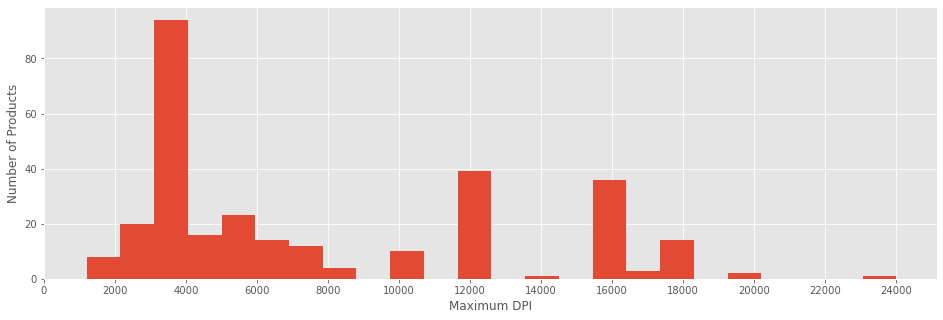

In [11]:
fig=plt.figure(figsize=(16,5))
plt.hist(mice['DPI'], bins=24)
plt.xticks(np.arange(0, 25000, step=2000))
plt.xlabel('Maximum DPI') 
plt.ylabel('Number of Products') 
plt.show()

**Buttons**

Observations:
- Almost half of the mice have 6 buttons. 
- There is a drop in number of products with specifically 10 buttons. 9 and 11 buttons both have more than twice the number of products with 10 buttons.

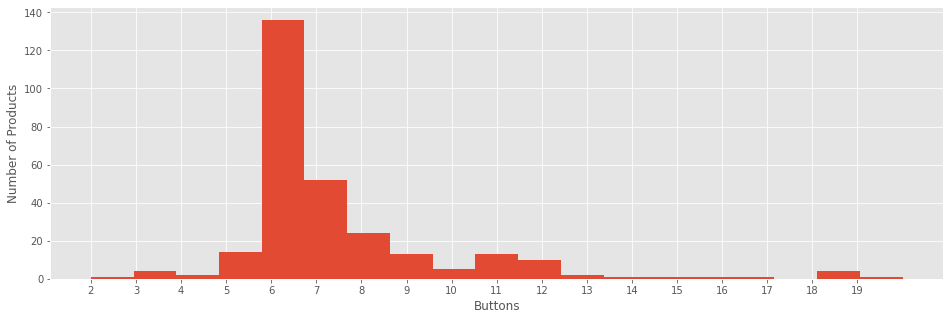

In [12]:
fig=plt.figure(figsize=(16,5))
plt.hist(mice['Buttons'], bins=19)
plt.xticks(np.arange(2, 20, step=1))
plt.xlabel('Buttons') 
plt.ylabel('Number of Products') 
plt.show()

**Connection Type**

Observations:
- Around 80% of the gaming mice looked at use wired connection. Only 20% have wireless capabilities.

In [13]:
mice.groupby([mice['Connection'].fillna('Unspecified')]).size().sort_values(ascending = False)

Connection
Wired          245
Wireless        55
Unspecified      8
dtype: int64

**Color**

Observations:
- 224 out of 293 products are black or partially black.
- Second highest color is white and only has 30 products.

In [14]:
print(mice.groupby([mice['Color'].fillna('Unspecified')]).size().sort_values(ascending = False).head(5))
print(len(mice[mice['Color'].str.contains('Black|black', na=False)]))
mice.Color.count()

Color
Black          206
White           30
Unspecified     15
Pink             6
Matte White      5
dtype: int64
224


293

<p><a name="FP"></a></p>

### Factors Contributing to Price

Observations:
- Most mice are below 30 dollars. 153 out of 308 mice are below 25
- Generally positive correlations between DPI/Buttons to Price.
- Based on correlation matrix, the DPI can be considered moderately correlated to Price where Buttons, Reviews and Rating have low or essentially no correlation.

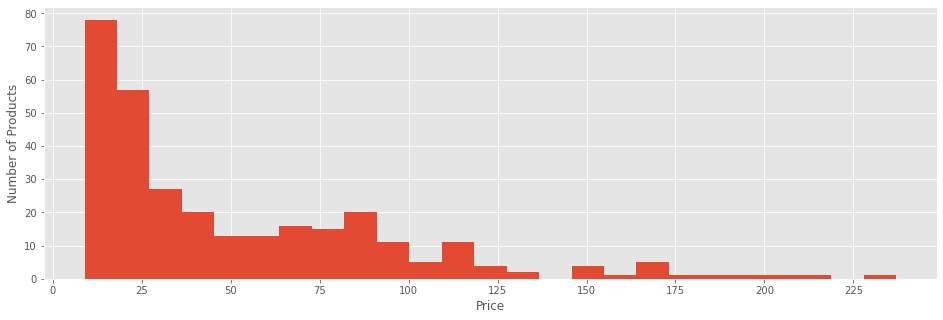

Number of mice less than $30: 
153


count    308.000000
mean      51.436104
std       43.293788
min        8.990000
25%       17.997500
50%       31.490000
75%       78.540000
max      236.990000
Name: Price, dtype: float64

In [47]:
fig=plt.figure(figsize=(16,5))
plt.hist(mice['Price'], bins=25)
plt.xticks(np.arange(0, 250, step=25))
plt.xlabel('Price') 
plt.ylabel('Number of Products') 
plt.show()

print('Number of mice less than $30: ')
print(mice[mice['Price']<30]['Price'].count())

mice.Price.describe()

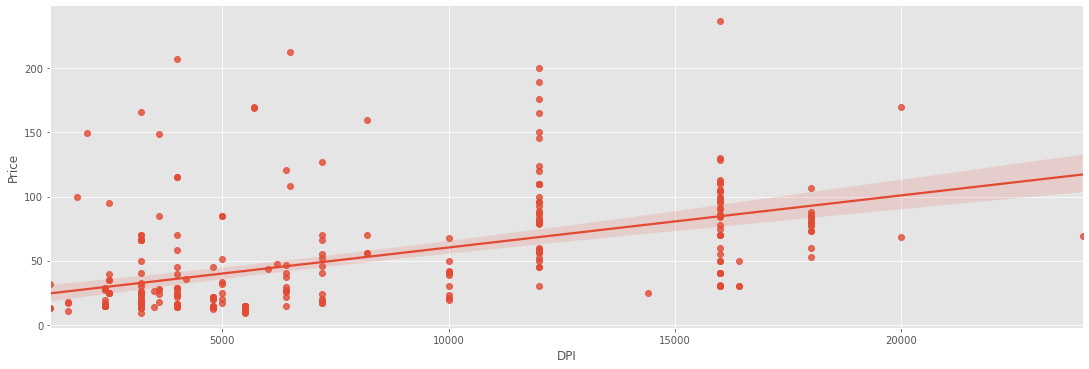

In [32]:
sns.lmplot(x = "DPI", y="Price", data=mice, height=5, aspect=3)

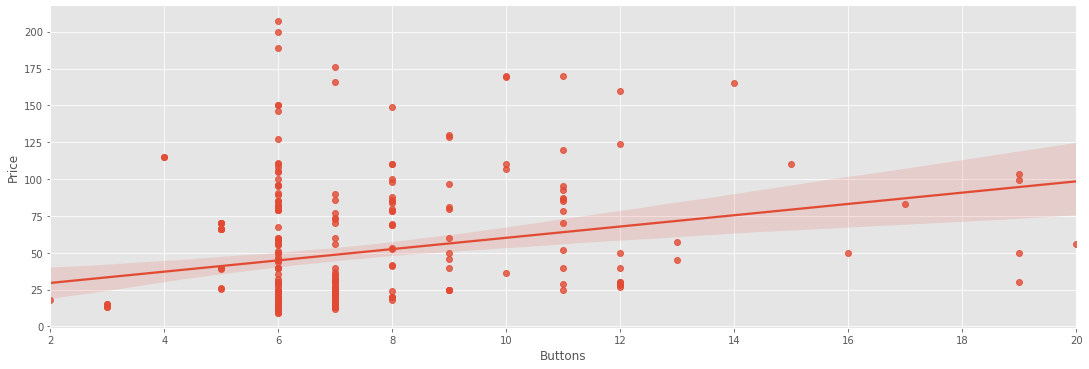

In [43]:
sns.lmplot(x = "Buttons", y="Price", data=mice, height=5, aspect=3)

<AxesSubplot:xlabel='Buttons', ylabel='Price'>

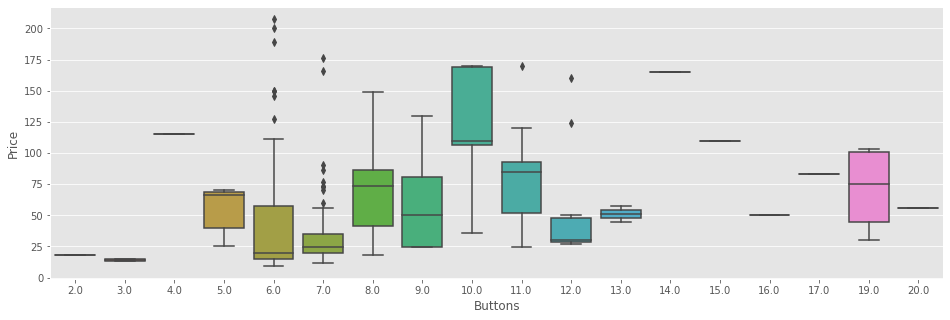

In [39]:
fig=plt.figure(figsize=(16,5))
sns.boxplot(x='Buttons', y='Price', data=mice)

<p><a name="FR"></a></p>

### Factors Contributing to Rating

Observations:
- 126 out of 147 mice are rated 4 stars and above. Not sure if Newegg manipulates any of the reviews but it appears much more often than not, customers are satisfied with the product.
- Very small observation correlation between DPI/Buttons to Rating. This perhaps makes sense since people know what they are buying so it would be strange to give a poor rating based on the customer's own decision based on DPI and number of buttons.
- Based on correlation matrix, it appears that the DPI, Buttons, Reviews and Price all have low or essentially no correlation with Rating.

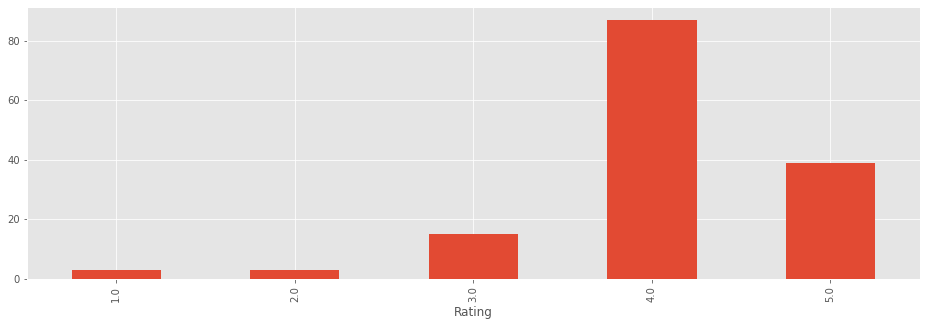

Number of mice rated 4 stars and above: 
126


count    147.000000
mean       4.061224
std        0.795746
min        1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: Rating, dtype: float64

In [72]:
fig=plt.figure(figsize=(16,5))
mice.groupby('Rating')['Rating'].count().plot.bar()
plt.show()

print('Number of mice rated 4 stars and above: ')
print(mice[mice['Rating']>=4]['Rating'].count())

mice.Rating.describe()

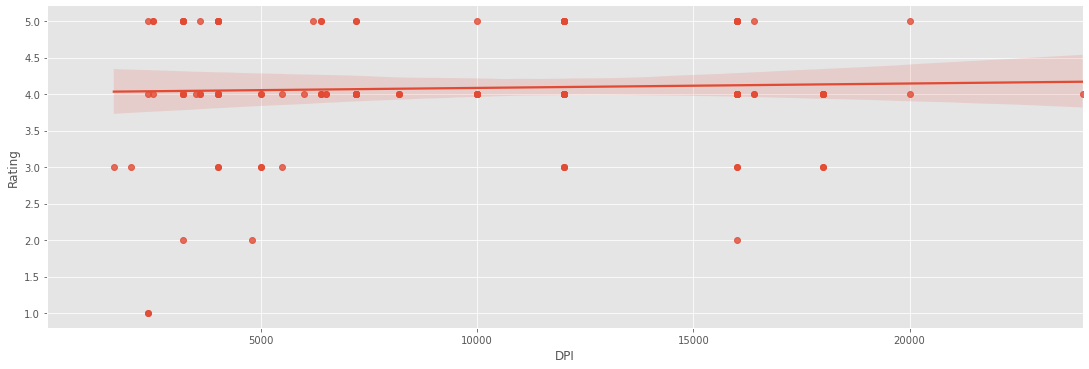

In [68]:
sns.lmplot(x = "DPI", y="Rating", data=mice, height=5, aspect=3)

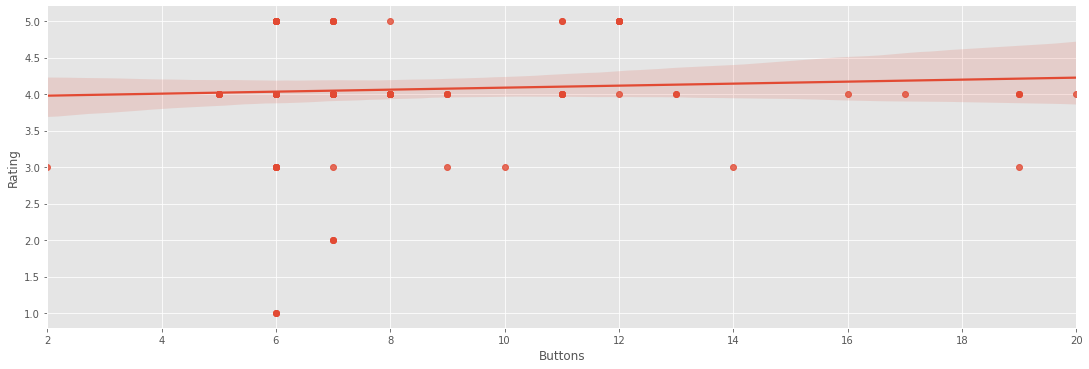

In [69]:
sns.lmplot(x = "Buttons", y="Rating", data=mice, height=5, aspect=3)

<p><a name="CM"></a></p>

### Factors Contributing to Rating

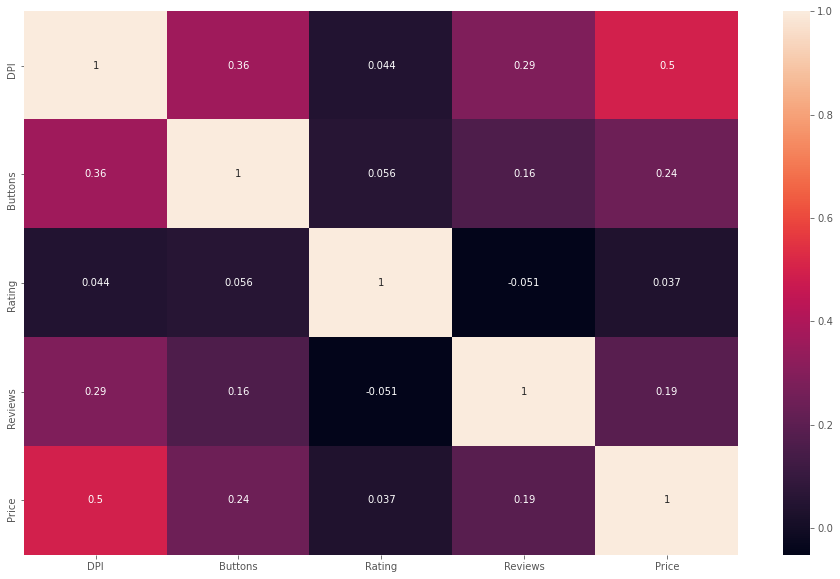

In [52]:
fig=plt.figure(figsize=(16,10))
corrMatrix = mice.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

### Things to Note

Rating is to the nearest star, not very good resolution.

Information can be incorrect.

Significant factors not looked at in project:
- One of the biggest contributing factors is most likely RGB, but difficult to extract whether or not product has RGB.
- Aesthetics. More "gamer" or futuristic aesthetics vs basic or more sleek designs. Secondary color.
- Ergonomics/type of the mouse. For example there are mice that are vertical or are in the form factor of a gun.
- Weight adjustability.